In [1]:
from DecisionTree import DTLearner
import numpy as np
import time
from sklearn.model_selection import train_test_split
import random

In [2]:
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)

In [3]:
#Cleaning up the data
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,0:-2]
output=data[:,-2:-1]
output[output<=22.3] = -1 #small heating load
output[output> 22.3] = 1 #large heating load
#values init
iterations=[]
timevals=[]
errorvalstest=[]
errorvalstrain=[]
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output, test_size=val, random_state=21296, shuffle=True)
    learner=DTLearner(leaf_size=1)
    start=time.time()
    iter= learner.add_evidence(X_train, y_train)
    end=time.time()
    timed=end-start
    yresult=learner.query(X_test)
    yresulttrain=learner.query(X_train)
    y_train=y_train.ravel()
    errortrain=yresulttrain-y_train
    percenerrortrain=sum(abs(errortrain)/2)/(y_train.size)
    y_test=y_test.ravel()
    error=yresult-y_test
    percenerror=sum(abs(error)/2)/(y_test.size)
    iterations.append(iter)
    timevals.append(timed)
    errorvalstest.append(percenerror)
    errorvalstrain.append(percenerrortrain)
print(iterations)
print(timevals)
print(errorvalstest)
print(errorvalstrain)


[9, 9, 13, 11, 11, 11, 7]
[0.009220123291015625, 0.005133152008056641, 0.006632089614868164, 0.006197929382324219, 0.005803108215332031, 0.005281209945678711, 0.005864143371582031]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011560693641618497]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [4]:
import matplotlib.pyplot as plt


In [5]:
#Cleaning up the data
input2=data[:,0:-2]
output2=data[:,-1:-1]
output2[output2<=22.3] = -1 #small heating load
output2[output2> 22.3] = 1 #large heating load
print(input2.shape)
print(output2.shape)
#values init
iterations2=[]
timevals2=[]
errorvalstest2=[]
errorvalstrain2=[]
vals2=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
for val in vals2:
    X_train, X_test, y_train, y_test = train_test_split (input, output, test_size=val, random_state=212)
    learner=DTLearner(leaf_size=1)
    start=time.time()
    iter1= learner.add_evidence(X_train, y_train)
    end=time.time()
    timed=end-start
    yresult=learner.query(X_test)
    yresulttrain=learner.query(X_train)
    y_train=y_train.ravel()
    errortrain=yresulttrain-y_train
    percenerrortrain=sum(abs(errortrain)/2)/(y_train.size)
    y_test=y_test.ravel()
    error=yresult-y_test
    percenerror=sum(abs(error)/2)/(y_test.size)
    iterations2.append(iter1)
    timevals2.append(timed)
    errorvalstest2.append(percenerror)
    errorvalstrain2.append(percenerrortrain)
print(iterations2)
print(timevals2)
print(errorvalstest2)
print(errorvalstrain2)

(768, 8)
(768, 0)
[9, 13, 13, 13, 13, 11, 3]
[0.017388105392456055, 0.009597063064575195, 0.011079788208007812, 0.007166862487792969, 0.006864070892333984, 0.006175041198730469, 0.0011081695556640625]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.006944444444444444, 0.023121387283236993]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/staceywies/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0, 0.5, 'Error Rate')

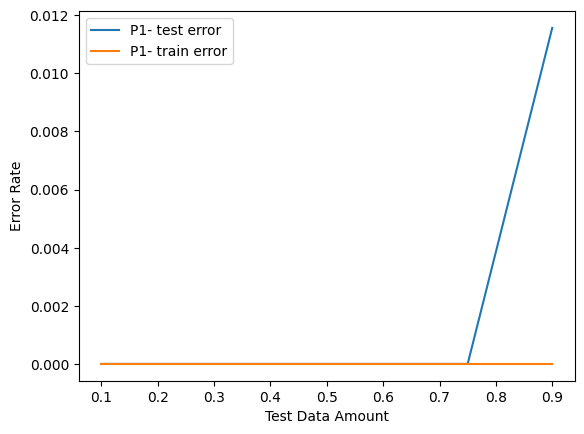

In [6]:
plt.plot(vals, errorvalstest, vals, errorvalstrain)
plt.legend(["P1- test error", "P1- train error"])
plt.xlabel("Test Data Amount")
plt.ylabel("Error Rate")

Text(0, 0.5, 'Error Rate')

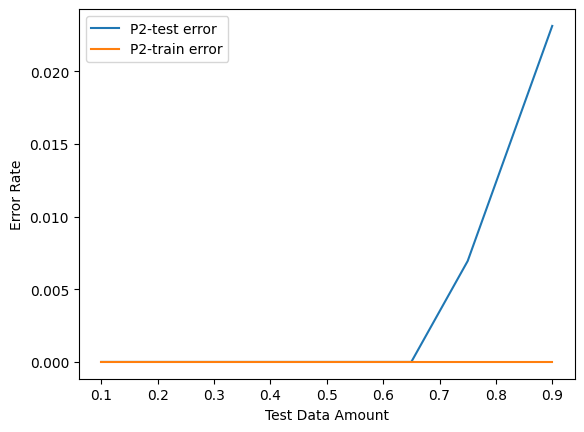

In [7]:
plt.plot(vals, errorvalstest2, vals, errorvalstrain2)
plt.legend(["P2-test error", "P2-train error"])
plt.xlabel("Test Data Amount")
plt.ylabel("Error Rate")

Text(0, 0.5, 'Iterations')

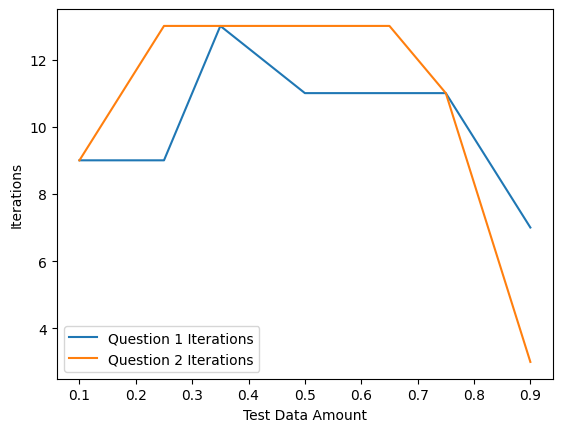

In [8]:
plt.plot(vals, iterations, vals, iterations2)
plt.legend(["Question 1 Iterations", "Question 2 Iterations"])
plt.xlabel("Test Data Amount")
plt.ylabel("Iterations")


Text(0, 0.5, 'time')

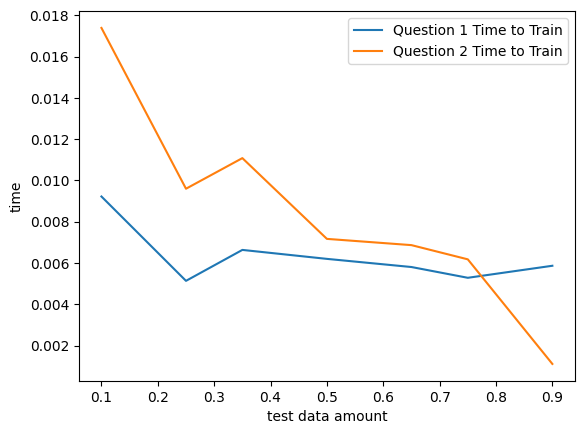

In [9]:
plt.plot(vals, timevals, vals, timevals2)
plt.legend(["Question 1 Time to Train", "Question 2 Time to Train"])
plt.xlabel("test data amount")
plt.ylabel("time")
